# 机器学习里面的分类问题
即逻辑斯蒂回归算法--是做分类的

线性回归模型
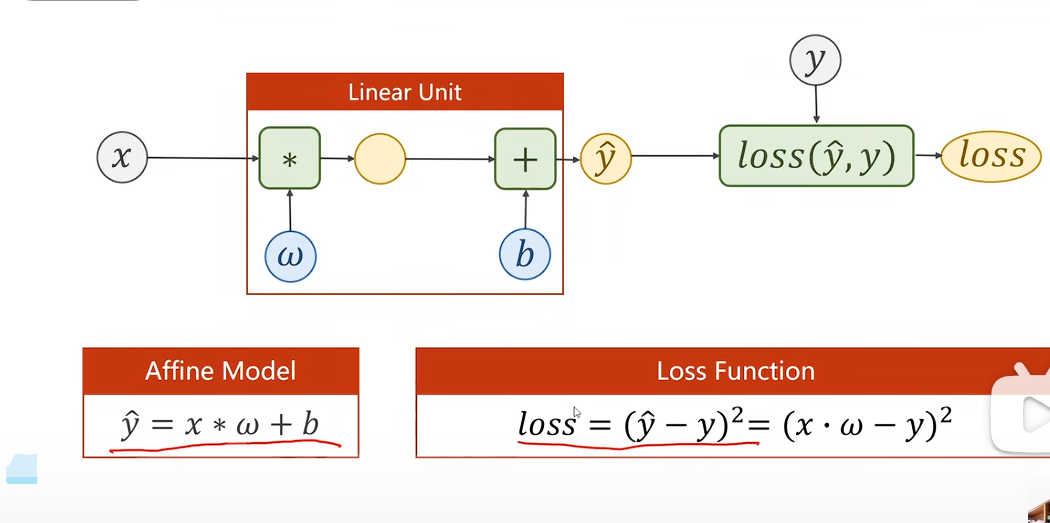

在很多机器学习任务中我们做的是分类任务
例如分类任务 估计的结果y是一个集合 估算y是其中的哪一个 是一个有限集合中找一个
即是分类问题
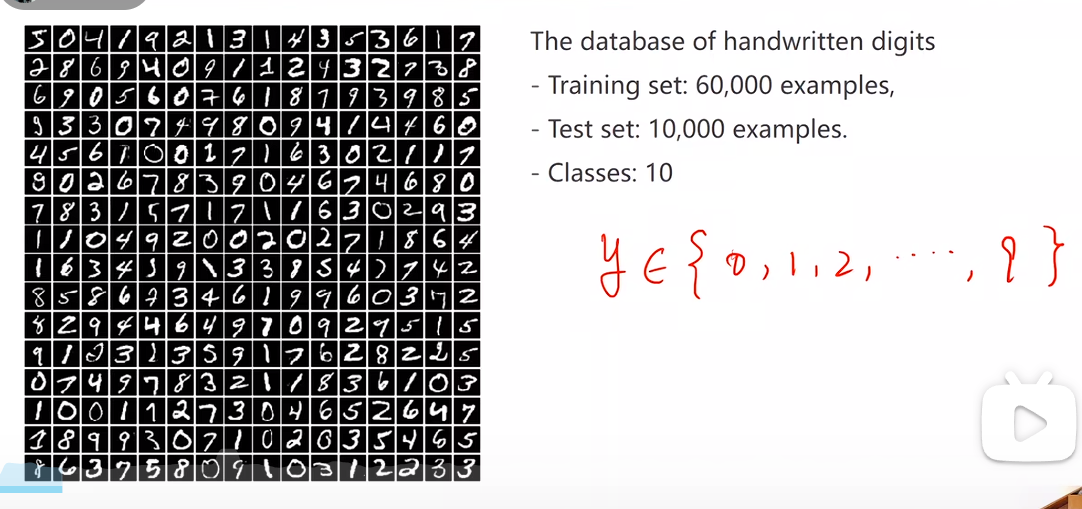
在分类问题中是看哪种情况的概率高一点 计算属于每一种情况的概率
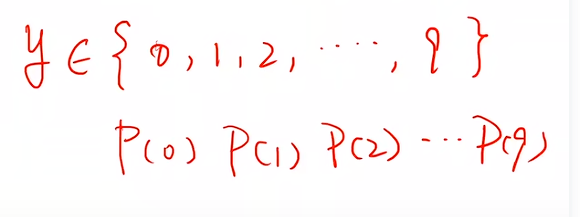

In [5]:
import torchvision #应用该包可以下载pytorch自带的数据集
train_set = torchvision.datasets.MNIST(root = '../dataset/mnist',train=True,download = True)
test_set = torchvision.datasets.MNIST(root = '../dataset/mnist',train=False,download = True)

In [6]:
import torchvision
train_set = torchvision.datasets.CIFAR10(root = '../dataset/mnist',train=True,download = True)
test_set = torchvision.datasets.CIFAR10(root = '../dataset/mnist',train=False,download = True)

Files already downloaded and verified
Files already downloaded and verified


同理也可以用来自动下载新的数据集
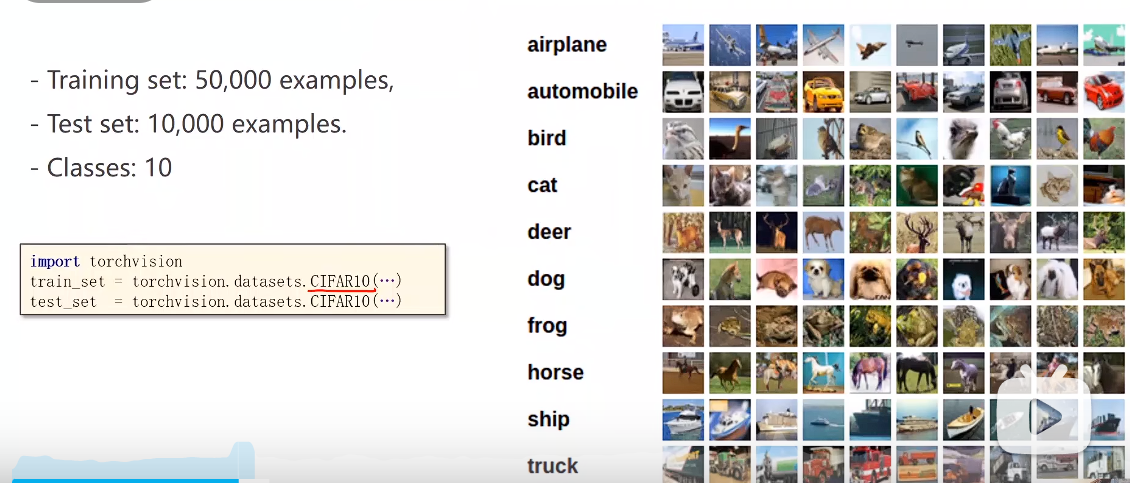

回归任务---分类任务（能否通过判断）
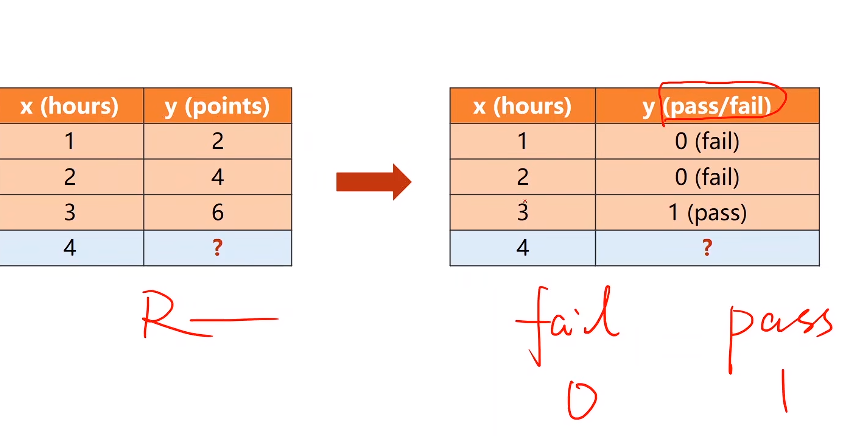
如果有两个分类就叫做 二分类问题
只需要计算其中的一个值
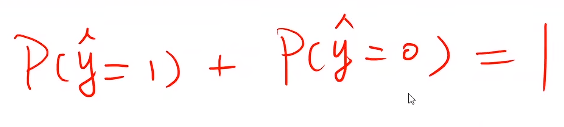
在分类问题中 模型输出的值即是它属于某个类别的概率

在回归任务中输出是一个实数
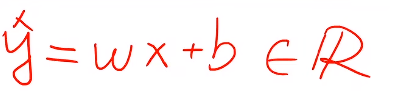
而在分类问题中输出是一个【0，1】上是一个概率
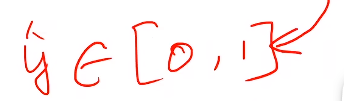
所以我们要用一个函数将R上的数映射到【0，1】上
这个映射函数即是逻辑斯蒂函数
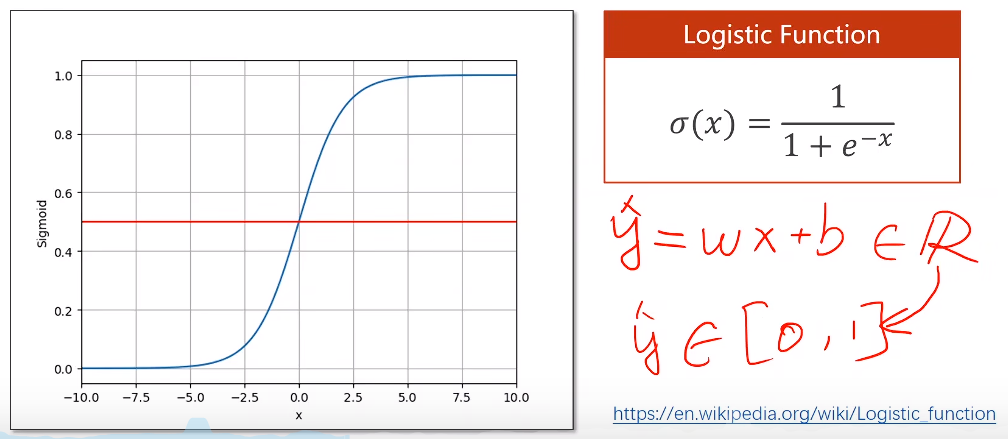
这是一个饱和函数 导函数长成如下
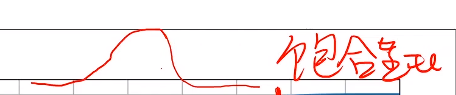

其他的饱和函数 在神经网络上用的很多 最出名的就是逻辑斯蒂函数 在pytorch库中这个函数
就叫做饱和函数
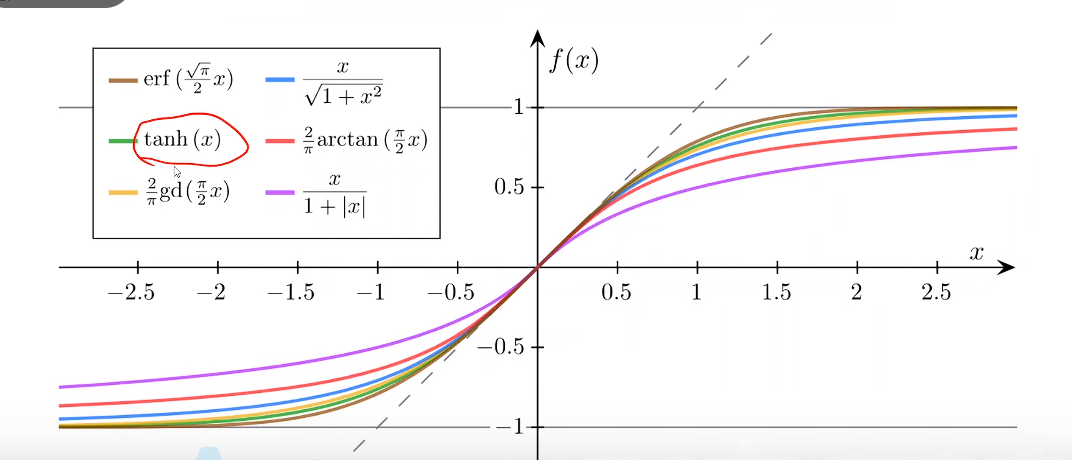

将线性回归变成分类问题===》通过logistic函数可以将其结果y^能固定在【0，1】之前
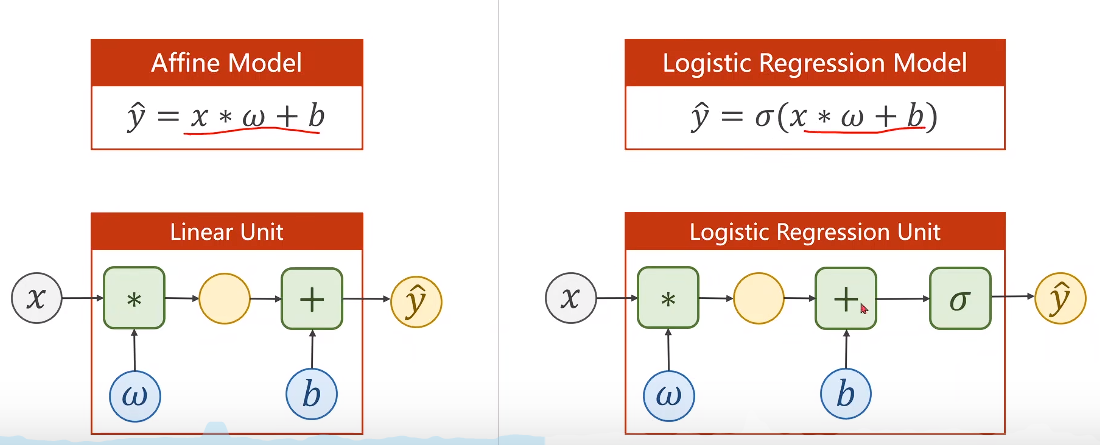
损失函数的变化
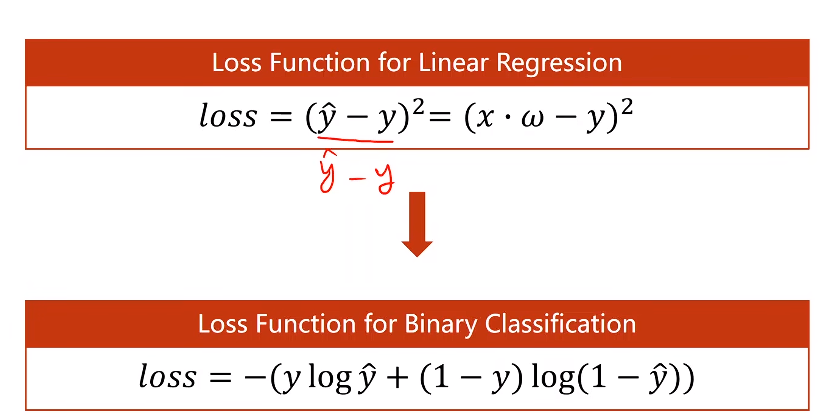计算分布的差异
交叉熵
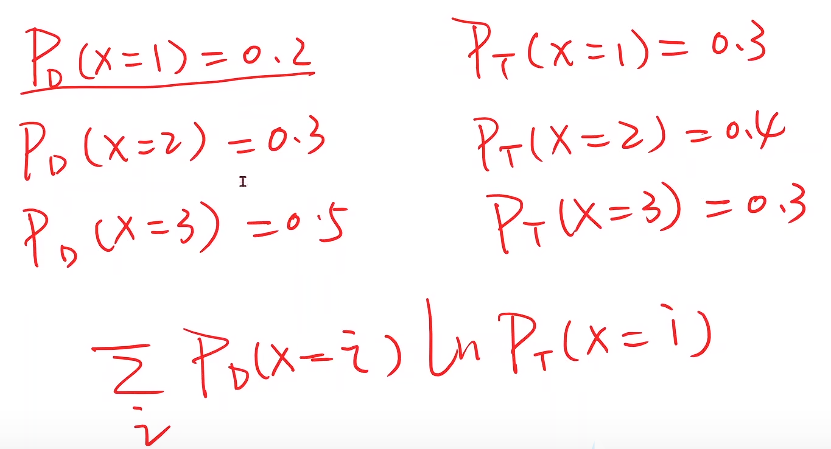
BCE损失即损失函数，和求小批量的BCE损失
y^越接近y则 BCEloss越小 ==》miniBCEloss即求均值的结果
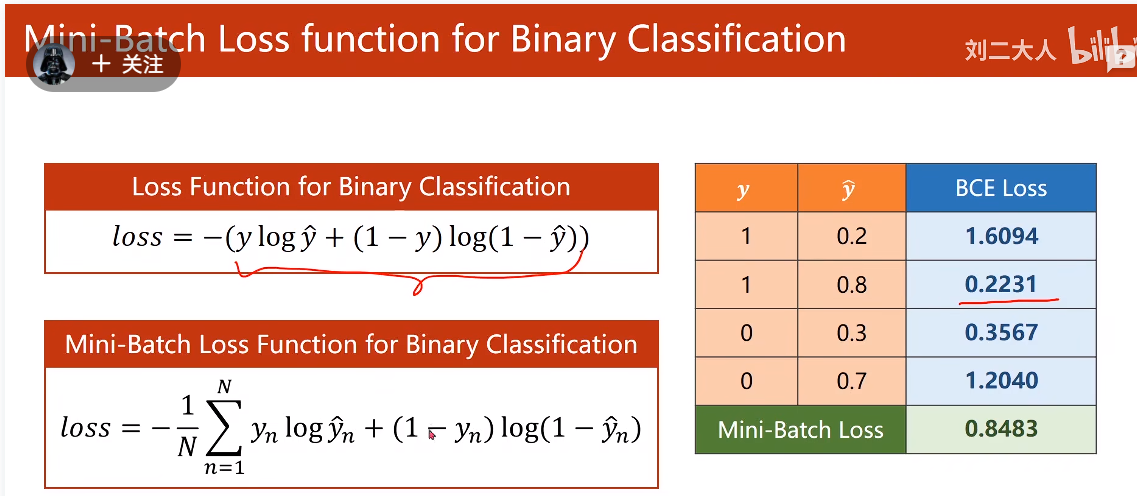

# 构造二分类模型--->在用pytorch构建线性回归的基础上进行修改

In [27]:
import torch
x_data = torch.Tensor([[1.0],[2.0],[3.0],[4.0]])
y_data = torch.Tensor([[0],[0],[1],[1]])
import torch.nn.functional as F #有一个函数包 包含了sigmoid函数进行
#线性回归转换为【0，1】
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel,self).__init__()
        self.linear = torch.nn.Linear(1,1)
        #torch.nn.Linear是pytorch里面的一个类 第一个参数是输入样本是几维的 第二个参数是输出样本的几维的
        #进行线性变换
    def forward(self,x):
        #进行signmoid（x）来得到转换到【0，1】上的数据
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
model = LogisticRegressionModel()

In [28]:
#此外损失也不同
criterion = torch.nn.BCELoss(size_average = False)
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)#得到的一个优化器对象

In [29]:
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    print(epoch,loss.item(),"3的预测值是：",model(torch.Tensor([[3.0]])).item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()#自动进行权重更新 

0 3.0223000049591064 3的预测值是： 0.6310003995895386
1 3.014648199081421 3的预测值是： 0.634547770023346
2 3.007340669631958 3的预测值是： 0.6378082036972046
3 3.0003280639648438 3的预测值是： 0.6408067941665649
4 2.9935665130615234 3的预测值是： 0.643566370010376
5 2.9870200157165527 3的预测值是： 0.6461074352264404
6 2.980658531188965 3的预测值是： 0.6484487652778625
7 2.974456310272217 3的预测值是： 0.6506072878837585
8 2.9683918952941895 3的预测值是： 0.6525983810424805
9 2.9624462127685547 3的预测值是： 0.6544361114501953
10 2.956604242324829 3的预测值是： 0.656133234500885
11 2.9508514404296875 3的预测值是： 0.6577011942863464
12 2.945178270339966 3的预测值是： 0.6591506600379944
13 2.939574718475342 3的预测值是： 0.6604912877082825
14 2.9340319633483887 3的预测值是： 0.6617318987846375
15 2.9285430908203125 3的预测值是： 0.6628804802894592
16 2.9231033325195312 3的预测值是： 0.6639444231987
17 2.9177064895629883 3的预测值是： 0.6649304032325745
18 2.9123482704162598 3的预测值是： 0.665844738483429
19 2.9070258140563965 3的预测值是： 0.6666929721832275
20 2.901735782623291 3的预测值是： 0.6674801707267

In [30]:
print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())
 
x_test = torch.Tensor([[3.0]])
y_test = model(x_test)
print("y_pred = ",y_test.data.item())

w =  1.4445544481277466
b =  -3.246446132659912
y_pred =  0.7478573322296143


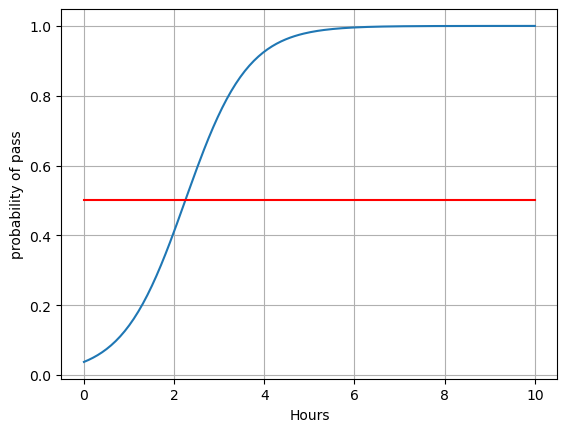

In [31]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,10,200)
x_t = torch.Tensor(x).view((200,1))
y_t = model(x_t)
y = y_t.data.numpy()
plt.plot(x,y)
plt.plot([0,10],[0.5,0.5],c = 'r')
plt.xlabel('Hours')
plt.ylabel('probability of pass')
plt.grid()
plt.show()